# Echocardiogram data set study

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
#sns.set_style("whitegrid") 

%matplotlib notebook

In [201]:
def plot_learning_curve(estimator, title, X, y, 
                        axes=None, 
                        ylim=None, 
                        cv=None, 
                        n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes == None:
        plt.figure()
        axes = plt.gca()
    axes.set_title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    axes.set_ylim((0.0, 1.05))
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    axes.grid()

    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, 
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    axes.plot(train_sizes, test_scores_mean, '*-', color="g",
             label="Cross-validation score")

    axes.legend(loc="best")
    return plt

def plot_validation_curve(estimator, title, X, y, param_name, param_range, 
                          axes=None, 
                          ylim=None, 
                          cv=None, 
                          n_jobs=None, 
                          scoring ='precision_micro', 
                          train_sizes=np.linspace(.1, 1.0, 5)):
    

    if axes == None:
        plt.figure()
        axes = plt.gca()
    axes.set_title(title)

    train_scores, test_scores = validation_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring = scoring, param_name = param_name, param_range = param_range)
    
    #train_sizes, train_scores, test_scores = learning_curve(
    #estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    axes.grid()

    axes.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r")
    axes.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, 
                      color="b")
    axes.plot(param_range, train_scores_mean, 'o-', color="r", markersize=2,
             label="Training score")
    axes.plot(param_range, test_scores_mean, '*-', color="b", markersize=2,
             label="Cross-validation score")
    
    axes.set_xlabel(param_name)
    #axes.set_xlim((min(param_range), max(param_range)))
    
    axes.set_ylabel(scoring)
    axes.set_ylim((ylim[0], ylim[1]))
    
    axes.legend(loc="best")
    return plt

## Reading and transformation of dataset

Data were not separated by commas as it would have been expected from a .csv file. Therefore, we had to split the data by comma separations and rearrange another data frame.

In [202]:
'''def read_csv():
    df = pd.read_csv('Echocardiogram data set\Echocardiogram.csv', 
                     header=None, names = list(range(9)), 
                     index_col = False, 
                     delimiter=',', 
                     )
    df = pd.DataFrame([x for x in df.loc[:,0].str.split(',')])
    df.drop(labels=13, axis=1, inplace=True)
    
    return df
echoDf = read_csv()
echoDf.head()
echoDf.dtypes'''

def read_csv():
    df = pd.read_csv('echocardiogram2.csv', # 'Echocardiogram data set\Echocardiogram2.csv'
                     header=None, names = list(range(13)), 
                     index_col = False, 
                     delimiter=';', 
                     )
    df.index = ['patient {}'.format(patient) for patient in range(1,df.shape[0] + 1)]
    return df
echoDf = read_csv()
print(echoDf.dtypes)
echoDf.head(250)

0     object
1     object
2     object
3      int64
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
dtype: object


,0,1,2,3,4,5,6,7,8,9,10,11,12
patient 1,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
patient 2,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
patient 3,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
patient 4,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
patient 5,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient 128,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
patient 129,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
patient 130,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
patient 131,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


In [203]:
## Variables ignored due to authors recommendation.
# - wall-motion-score. Use wall-motion-index better
# - mult
# - name
# - group

In [204]:
try:
    echoDf.columns = ['Survival', 
                      'Still-alive', 
                      'Age-at-heart-attack', 
                      'Pericardial-effusion', 
                      'Fractional-shortening',
                      'epss',
                      'lvdd',
                      'Wall-motion-score',
                      'Wall-motion-index',
                      'Mult',
                      'Name',
                      'Group',
                      'Alive-at-1']
except:
    pass
echoDf.drop(labels=['Wall-motion-score', 'Mult', 'Name', 'Group'], axis=1, inplace=True, errors='ignore')

print('Shape before dropping nan values:',echoDf.shape, '\n') # OK
for x in echoDf.columns:
    print(x,':', len(echoDf[echoDf[x] == '?']))

Shape before dropping nan values: (132, 9) 

Survival : 1
Still-alive : 1
Age-at-heart-attack : 6
Pericardial-effusion : 0
Fractional-shortening : 8
epss : 15
lvdd : 11
Wall-motion-index : 2
Alive-at-1 : 57


Dimensions of dataset

In [205]:
echoDf.shape

(132, 9)

In [206]:
echoDf.head(10)

,Survival,Still-alive,Age-at-heart-attack,Pericardial-effusion,Fractional-shortening,epss,lvdd,Wall-motion-index,Alive-at-1
patient 1,11,0,71,0,0.260,9,4.600,1,0
patient 2,19,0,72,0,0.380,6,4.100,1.700,0
patient 3,16,0,55,0,0.260,4,3.420,1,0
patient 4,57,0,60,0,0.253,12.062,4.603,1.450,0
patient 5,19,1,57,0,0.160,22,5.750,2.250,0
patient 6,26,0,68,0,0.260,5,4.310,1,0
patient 7,13,0,62,0,0.230,31,5.430,1.875,0
patient 8,50,0,60,0,0.330,8,5.250,1,0
patient 9,19,0,46,0,0.340,0,5.090,1.140,0
patient 10,25,0,54,0,0.140,13,4.490,1.190,0


Distribution of the target

In [207]:
echoDf['Alive-at-1'].value_counts()

?    57
0    50
1    24
2     1
Name: Alive-at-1, dtype: int64

Replace '?' string value to 'np.nan' (except those from 'Alive at-1'), in other words.

In [188]:
echoDf[echoDf[echoDf.columns[:-1]] == '?'] = np.nan

## Option 1: drop nan values from 3 columns. We might think that nan values shouldn't take median from 'age' column
echoDf.dropna(subset = ['Survival','Still-alive', 'Age-at-heart-attack'], inplace = True)
## drop nan values ##

echoDf.dtypes
print('Shape of data set before calculating medians:',echoDf.shape) # OK
for x in echoDf.columns:
    print(x,':', len(echoDf[echoDf[x].isnull()]))
print('\n')

## Option 2: impute nan values to median values from each column
columns_median = ['Fractional-shortening', 'epss', 'lvdd', 'Wall-motion-index']
echoDf.fillna(dict(zip(columns_median, echoDf[columns_median].agg(np.median))), inplace = True)

print('Shape after calculating medians:',echoDf.shape) # OK
for x in echoDf.columns:
    print(x,':', len(echoDf[echoDf[x].isnull()]))

Shape of data set before calculating medians: (125, 9)
Survival : 0
Still-alive : 0
Age-at-heart-attack : 0
Pericardial-effusion : 0
Fractional-shortening : 6
epss : 14
lvdd : 9
Wall-motion-index : 1
Alive-at-1 : 0


Shape after calculating medians: (125, 9)
Survival : 0
Still-alive : 0
Age-at-heart-attack : 0
Pericardial-effusion : 0
Fractional-shortening : 0
epss : 0
lvdd : 0
Wall-motion-index : 0
Alive-at-1 : 0


Change dtypes except Alive-at-1, which needs other treatment

In [189]:
floatCol = ['Survival', 
            'Age-at-heart-attack', 
            'Pericardial-effusion', 
            'Fractional-shortening',
            'epss',
            'lvdd',
            'Wall-motion-index'
           ]
## Convert columns datatype to float
echoDf[floatCol] = echoDf[floatCol].astype('float')

In [190]:
catCol = ['Still-alive',
          'Alive-at-1',
         ]
echoDf[catCol] = echoDf[catCol].astype('category')

In [191]:
echoDf.dtypes

Survival                  float64
Still-alive              category
Age-at-heart-attack       float64
Pericardial-effusion      float64
Fractional-shortening     float64
epss                      float64
lvdd                      float64
Wall-motion-index         float64
Alive-at-1               category
dtype: object

## Inferring patients who survived for at least one year

Now, we will combine Survival and Still-alive variables to find those patients that could survive for at least one year.

In [192]:
## Drop the patients that are still alive (Still-alive = 1) and have not reached survival of 12 months,
## following a heart attack (Survival variable).
patients_out_train = echoDf[(echoDf['Survival'] < 12) & (echoDf['Still-alive'] == '1')].index
print('Number of patients discarded from training data:', len(patients_out_train))

echoDf_patientsOut = echoDf.drop(labels=patients_out_train, axis=0, errors='ignore').copy()

patients_out_train

Number of patients discarded from training data: 32


Index(['patient 11', 'patient 15', 'patient 17', 'patient 18', 'patient 20',
       'patient 21', 'patient 22', 'patient 23', 'patient 24', 'patient 29',
       'patient 31', 'patient 32', 'patient 38', 'patient 45', 'patient 49',
       'patient 51', 'patient 52', 'patient 55', 'patient 64', 'patient 67',
       'patient 71', 'patient 77', 'patient 84', 'patient 85', 'patient 87',
       'patient 91', 'patient 99', 'patient 100', 'patient 105', 'patient 109',
       'patient 110', 'patient 128'],
      dtype='object')

### It looks like the variable 'alive-at-1' is not well suited due to unkown reasons.
We are going to change this column:

- Value 1 if the patients survived at least 12 months; 0 if they survived less than 12 months and they should have passed away.

- We offer two conversion options that will end up with different data sets:

        Option 1. Convert column 'Alive-at-1' using first two columns. This option obeys the recommendation issued from the source. If this was to be taken, few zero class values will be obtained.
     
        Option 2. Convert only '?' values from 'Alive-at-1'.
    
We think that option 1 is more correct since values from 'Alive-at-1' don't seem to follow the rules from the source.

In [193]:
option = 2

In [197]:
if option == 1:
    ## Option 1. Convert the entire column 'Alive-at-1'
    target_rearranged = [1 if surv >= 12 else 0 for surv in echoDf_patientsOut[['Survival', '']].values]
    echoDf_patientsOut_transf = echoDf_patientsOut.copy()
    echoDf_patientsOut_transf.loc[:, 'Alive-at-1'] = target_rearranged
else:
    ## Option 2. Convert only those values with '?' from 'Alive-at-1'
    try:
        echoDf_patientsOut.loc[:, 'Alive-at-1'] = [1 if (months >= 12) and (alive_12) == '?' else 0 for months, alive_12 in echoDf_patientsOut[['Survival', 'Alive-at-1']].values]
        ## We drop columns that we won't need anymore:
        echoDf_patientsOut_transf = echoDf_patientsOut.drop(labels=['Survival', 'Still-alive'], axis = 1, errors = 'ignore').copy()
    except:
        print('...Data Frame already changed...\n')
print(echoDf_patientsOut_transf.dtypes)
echoDf_patientsOut_transf.describe()

Age-at-heart-attack      float64
Pericardial-effusion     float64
Fractional-shortening    float64
epss                     float64
lvdd                     float64
Wall-motion-index        float64
Alive-at-1                 int64
dtype: object


,Age-at-heart-attack,Pericardial-effusion,Fractional-shortening,epss,lvdd,Wall-motion-index,Alive-at-1
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,61.537634,0.150538,0.230484,11.138118,4.676473,1.275000,0.440860
std,7.996683,0.359536,0.108878,6.568236,0.816453,0.350088,0.499181
min,35.000000,0.000000,0.030000,0.000000,2.320000,1.000000,0.000000
25%,57.000000,0.000000,0.150000,7.000000,4.170000,1.000000,0.000000
50%,61.000000,0.000000,0.217000,10.000000,4.560000,1.140000,0.000000
75%,66.000000,0.000000,0.290000,13.200000,5.250000,1.390000,1.000000
max,81.000000,1.000000,0.610000,31.000000,6.780000,2.390000,1.000000


New distribution of the target

In [214]:
echoDf_patientsOut_transf['Alive-at-1'].value_counts()

0    52
1    41
Name: Alive-at-1, dtype: int64

## Deep data analysis

Histograms for Alive-at-1 equal to zero.

<IPython.core.display.Javascript object>


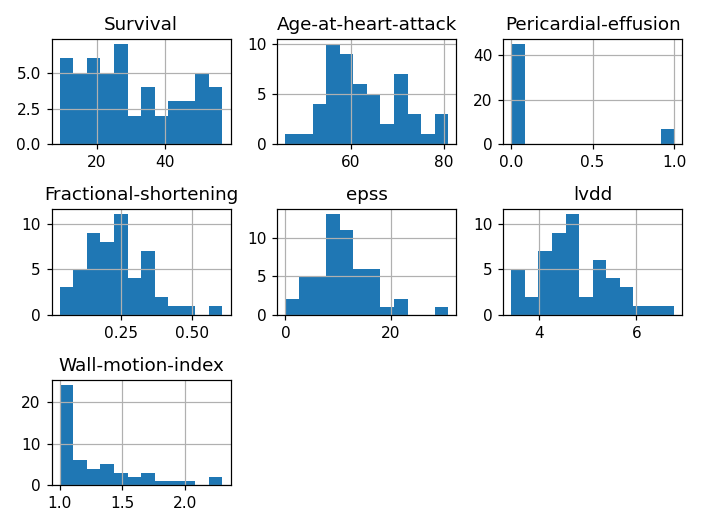

In [216]:
rows = echoDf.shape[0]

echoDf_patientsOut.loc[echoDf_patientsOut['Alive-at-1'] == 0, echoDf_patientsOut.columns[:-1]].hist(bins = int(np.sqrt(rows)) + 1)
plt.tight_layout()

Index(['Age-at-heart-attack', 'Pericardial-effusion', 'Fractional-shortening',
       'epss', 'lvdd', 'Wall-motion-index'],
      dtype='object')

<IPython.core.display.Javascript object>


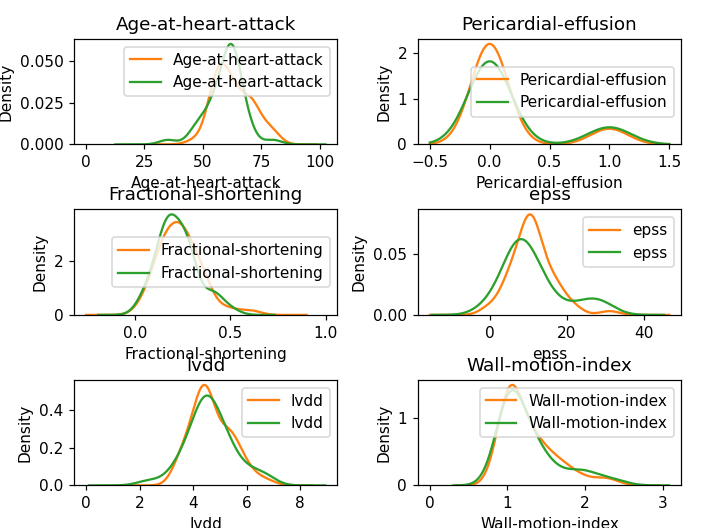

In [239]:
filter_ = echoDf_patientsOut_transf['Alive-at-1'] == "1"
num_cols = echoDf_patientsOut_transf.select_dtypes("float").columns

echoDf_patientsOut_transf.loc[filter_, num_cols].hist(bins = int(np.sqrt(10)) + 1)
plt.tight_layout()

In [248]:
list(enumerate(num_cols))

[(0, 'Age-at-heart-attack'),
 (1, 'Pericardial-effusion'),
 (2, 'Fractional-shortening'),
 (3, 'epss'),
 (4, 'lvdd'),
 (5, 'Wall-motion-index')]

In [246]:
#fig = plt.figure((10, 8))
for n, column in enumerate(num_cols):
    plt.subplot(len(num_cols) // 2, 2, n + 1)
    #plt.figure()
    echoDf_patientsOut_transf.loc[echoDf_patientsOut_transf['Alive-at-1'] == 0, column].plot.density()
    echoDf_patientsOut_transf.loc[echoDf_patientsOut_transf['Alive-at-1'] == 1, column].plot.density()
    plt.legend()
    plt.xlabel(column)

<ipython-input-246-859de12eca4e>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(len(num_cols) // 2, 2, n + 1)
<ipython-input-246-859de12eca4e>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(len(num_cols) // 2, 2, n + 1)
<ipython-input-246-859de12eca4e>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version

## Visualization block

<IPython.core.display.Javascript object>


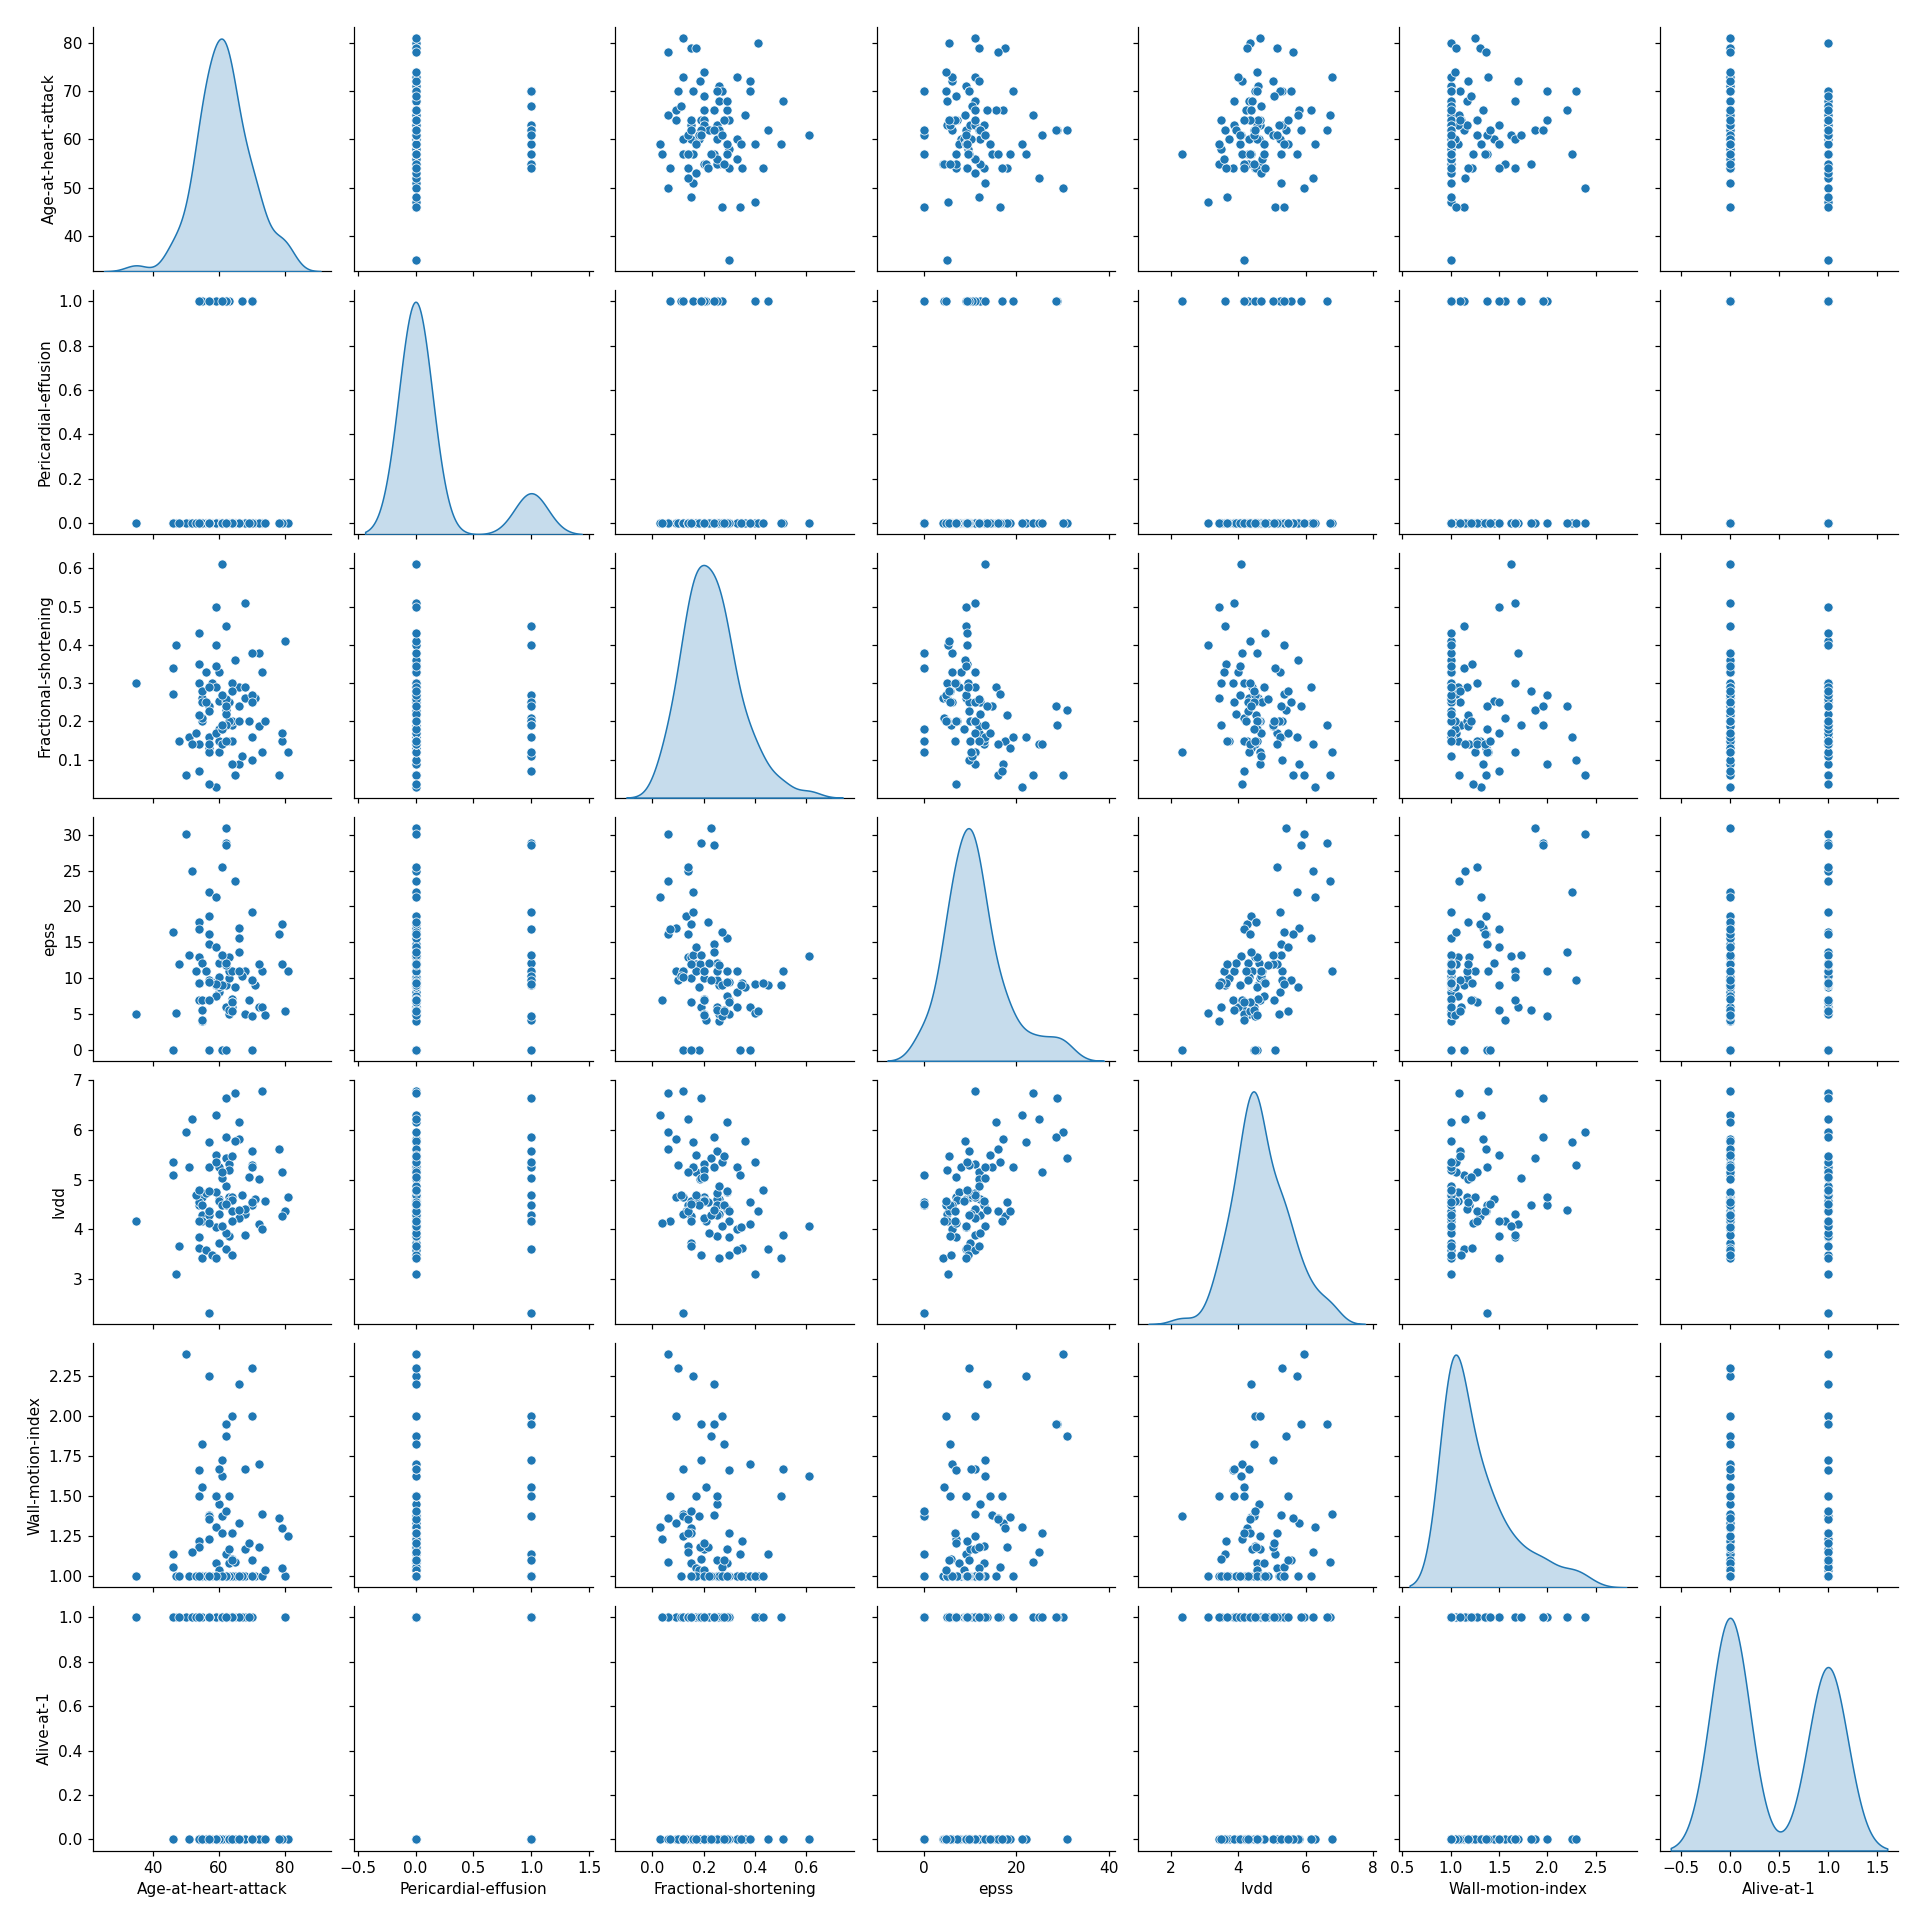

In [249]:
'''fig, axes = plt.subplots()

axes.hist(x = echoDf['epss'], bins = int(np.sqrt(echoDf.shape[0])), density  = True)
snsdistplot(x = echoDf['epss'])'''

sns.pairplot(echoDf_patientsOut_transf.loc[:, echoDf_patientsOut_transf.columns[:]], kind='scatter', diag_kind='kde')
plt.show()

In [252]:
echoDf_patientsOut_transf.corr()

,Age-at-heart-attack,Pericardial-effusion,Fractional-shortening,epss,lvdd,Wall-motion-index,Alive-at-1
Age-at-heart-attack,1.000000,0.020692,-0.062860,-0.047416,0.164549,0.038104,-0.207063
Pericardial-effusion,0.020692,1.000000,-0.032425,0.096333,0.046263,0.125648,0.050144
Fractional-shortening,-0.062860,-0.032425,1.000000,-0.337917,-0.335382,-0.158176,-0.068765
epss,-0.047416,0.096333,-0.337917,1.000000,0.565441,0.358961,0.007151
lvdd,0.164549,0.046263,-0.335382,0.565441,1.000000,0.177111,-0.035082
Wall-motion-index,0.038104,0.125648,-0.158176,0.358961,0.177111,1.000000,0.006095
Alive-at-1,-0.207063,0.050144,-0.068765,0.007151,-0.035082,0.006095,1.000000


In [254]:
echoDf_patientsOut_transf.corr()

,Age-at-heart-attack,Pericardial-effusion,Fractional-shortening,epss,lvdd,Wall-motion-index,Alive-at-1
Age-at-heart-attack,1.000000,0.020692,-0.062860,-0.047416,0.164549,0.038104,-0.207063
Pericardial-effusion,0.020692,1.000000,-0.032425,0.096333,0.046263,0.125648,0.050144
Fractional-shortening,-0.062860,-0.032425,1.000000,-0.337917,-0.335382,-0.158176,-0.068765
epss,-0.047416,0.096333,-0.337917,1.000000,0.565441,0.358961,0.007151
lvdd,0.164549,0.046263,-0.335382,0.565441,1.000000,0.177111,-0.035082
Wall-motion-index,0.038104,0.125648,-0.158176,0.358961,0.177111,1.000000,0.006095
Alive-at-1,-0.207063,0.050144,-0.068765,0.007151,-0.035082,0.006095,1.000000


In [256]:
for colY in ['Age-at-heart-attack', 'Fractional-shortening', 'epss', 'lvdd', 'Wall-motion-index']:
    fig, axes = plt.subplots(1, 2)
    sns.boxplot(x = 'Pericardial-effusion', y = colY, data = echoDf, boxprops=dict(alpha=.7), ax = axes[0])
    sns.swarmplot(x = 'Pericardial-effusion', y = colY, data = echoDf, ax = axes[0])
    
    sns.boxplot(x = 'Alive-at-1', y = colY, data = echoDf, boxprops=dict(alpha=.7), ax = axes[1])
    sns.swarmplot(x = 'Alive-at-1', y = colY, data = echoDf, ax = axes[1])
    plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the marke

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
plt.figure()
plt.hist(echoDf['Alive-at-1'], align = 'mid')
plt.gca().set_title("Number of classes in target")
plt.gca().set_xlabel('Alive at 1 year')
plt.gca().set_ylabel('Counts')
plt.gca().set_xticks([0, 1.0])
plt.gca().axis([-0.5, 1.5, 0, 90])

In [ ]:
## General information about our final data set
echoDf.info()

## Machine Learning blocks ##

In [257]:
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
##
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
##
from sklearn.naive_bayes import GaussianNB
##
from sklearn.ensemble import RandomForestClassifier
##
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
##
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report # (y_test, y_pred, target_names)

from sklearn.metrics import precision_recall_curve # (y_test, y_scores_lr) * y_scores_lr from .decision function() after fitting model
from sklearn.metrics import roc_curve, auc # same from above
from sklearn.metrics import roc_auc_score
from sklearn.metrics.scorer import SCORERS

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Index(['Age-at-heart-attack', 'Pericardial-effusion', 'Fractional-shortening',
       'epss', 'lvdd', 'Wall-motion-index'],
      dtype='object')

In [275]:
y

array([[-0.20706342],
       [ 0.05014407],
       [-0.0687651 ],
       [ 0.00715131],
       [-0.03508164],
       [ 0.0060954 ],
       [ 1.        ]])

In [276]:
## Take numpy matrices from DataFrame and build data and target variables
X = echoDf_patientsOut_transf[echoDf_patientsOut_transf.select_dtypes("float").columns].values
y = echoDf_patientsOut_transf.loc[:, 'Alive-at-1'].values.reshape(-1, 1)

## Initialize object which computes polynomial features and fit float64
## datatype columns
polynomial_features_degree = 2

polFeatures = PolynomialFeatures(degree=polynomial_features_degree, include_bias = False)
X_pol_features = polFeatures.fit_transform(X[:, 2:6])

## Concatenate non-transformed columns to those transformed
X_extended = np.concatenate((X[:, 0:2], X_pol_features), axis = 1)
#X_extended = X_extended[:, 1:-1]

## Split data into train and test sets.
X_tr, X_ts, y_tr, y_ts = train_test_split(X_extended, y, test_size = 0.2, random_state = 117)

## Scale by removing the mean and scaling to 1 unit variance:
scale_on_tr = StandardScaler().fit(X_tr)
X_tr = scale_on_tr.transform(X_tr)
X_ts = scale_on_tr.transform(X_ts)

print('Shapes of Polynomial features and extended DataFrame:\n', X_pol_features.shape, X_extended.shape)
print('Shapes of train and test data:\n', X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape )

print('Names of polynomial features:\n', polFeatures.get_feature_names())

Shapes of Polynomial features and extended DataFrame:
 (93, 14) (93, 16)
Shapes of train and test data:
 (74, 16) (19, 16) (74, 1) (19, 1)
Names of polynomial features:
 ['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']


In [277]:
X_extended[:, 1:-1].shape

(93, 14)

<IPython.core.display.Javascript object>


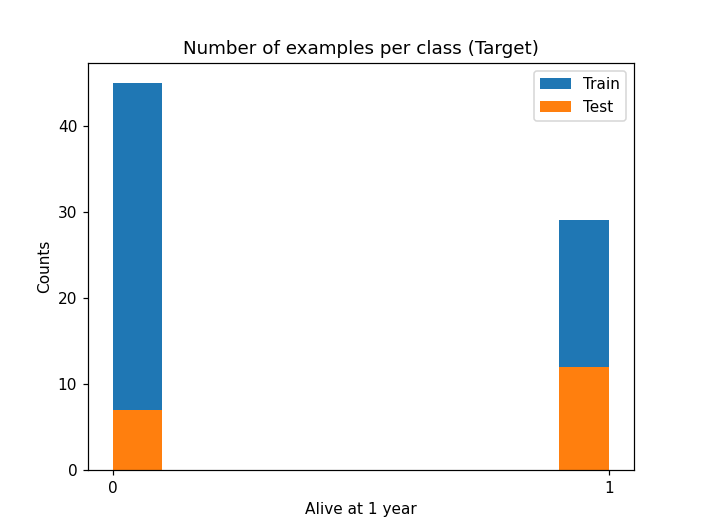

In [279]:
plt.figure()
plt.hist(y_tr, align = 'mid')
plt.hist(y_ts, align = 'mid')
plt.gca().set_title("Number of examples per class (Target)")
plt.gca().set_xlabel('Alive at 1 year')
plt.gca().set_ylabel('Counts')
plt.gca().set_xticks([0, 1.0])
plt.gca().legend(['Train', 'Test'])

#plt.figure()
#sns.pairplot(pd.DataFrame(X_pol_features[:, 1:], columns = polFeatures.get_feature_names()[1:]), kind='scatter', diag_kind='kde')
plt.show()

In [287]:
## Logistic regression
model_1_fit = LogisticRegression(penalty = 'l2', 
                                 C = 0.01,
                                 solver = 'liblinear',
                                 class_weight  = 'balanced',
                                 random_state = 117, 
                                 max_iter = 500).fit(X_tr, np.ravel(y_tr))
model_1 = LogisticRegression(solver = 'liblinear',
                             class_weight  = 'balanced',
                             random_state = 117, 
                             max_iter = 1000)

parameters1 = {'C': np.linspace(1e-4, 1, 10), 
             'penalty': ['l1', 'l2']}
##

## Random Forest
model_2_fit = RandomForestClassifier(n_estimators = 15,
                                     max_depth = 5,
                                     max_features = 2,
                                     max_leaf_nodes = None,
                                     min_samples_leaf = 2,
                                     class_weight  = 'balanced',
                                     criterion = 'entropy',
                                     random_state = 117).fit(X_tr, np.ravel(y_tr))
model_2 = RandomForestClassifier(class_weight  = 'balanced', random_state = 117).fit(X_tr, np.ravel(y_tr))

parameters2 = {'n_estimators': np.arange(100, 200 + 10, 10), 
             'max_depth': [3, 5, 7, 10], 
             'min_samples_split': [2], 
             'max_features': ['auto', 'log2', None, 2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3], 
             'criterion': ['entropy', 'gini'], 
             'bootstrap': [True, False]}

## Naive Bayes Gaussian:

model_3_fit = GaussianNB().fit(X_tr, np.ravel(y_tr))

for model, model_name in zip([model_1_fit, model_2_fit, model_3_fit], ['Logistic', 'Random Forest', 'NB_gaussian']): 
    ##
    print('Model_1 {}:\n'.format(model_name))
    print('Scores on train set:\n', '-'*20)

    print('Precision:\n', precision_score(y_tr, model.predict(X_tr)))
    print('Recall :\n', recall_score(y_tr, model.predict(X_tr)))

    print('')

    print('Scores on test set:\n', '-'*20)
    print('Precision :\n', precision_score(y_ts, model.predict(X_ts)))
    print('Recall :\n', recall_score(y_ts, model.predict(X_ts)), '\n')
    
    confusion_matrix(y_ts.reshape(-1,1), model.predict(X_ts).reshape(-1,1))# , labels = [1, 0])

## Grid Search for splitted sets

## Grid Search for X_extended and target

model_1_GS = GridSearchCV(model_1,
                          param_grid = parameters1,
                          iid = 'False',
                          cv = 2,
                          #scoring = ['precision', 'recall'],
                          refit = True)
model_2_GS_prec = GridSearchCV(model_2,
                          param_grid = parameters2,
                          iid = 'False',
                          cv = 2,
                          scoring = 'precision',
                          refit = True)

Model_1 Logistic:

Scores on train set:
 --------------------
Precision:
 0.47368421052631576
Recall :
 0.6206896551724138

Scores on test set:
 --------------------
Precision :
 0.75
Recall :
 0.5 

Model_1 Random Forest:

Scores on train set:
 --------------------
Precision:
 0.92
Recall :
 0.7931034482758621

Scores on test set:
 --------------------
Precision :
 0.625
Recall :
 0.4166666666666667 

Model_1 NB_gaussian:

Scores on train set:
 --------------------
Precision:
 0.5333333333333333
Recall :
 0.27586206896551724

Scores on test set:
 --------------------
Precision :
 0.75
Recall :
 0.25 



<IPython.core.display.Javascript object>


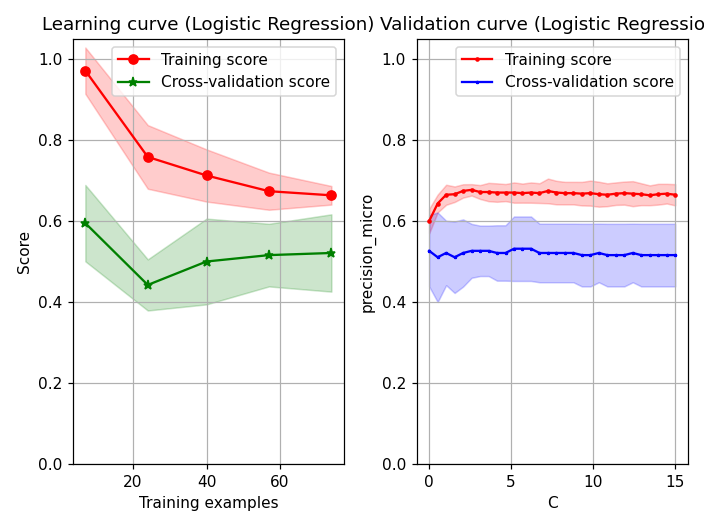

<IPython.core.display.Javascript object>


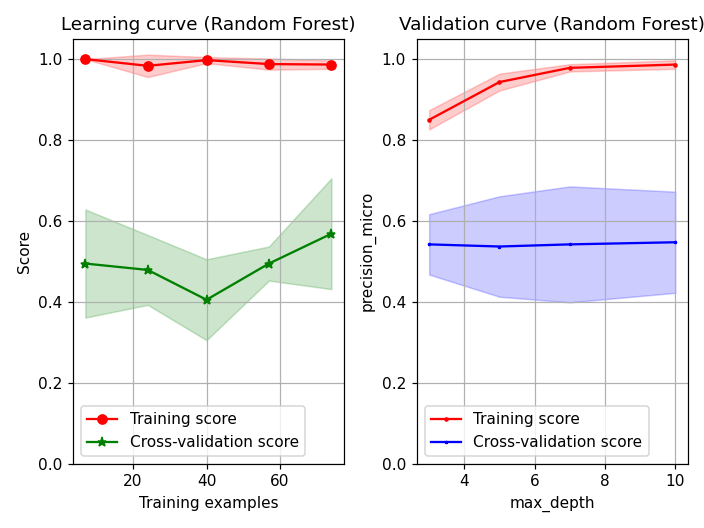

<IPython.core.display.Javascript object>


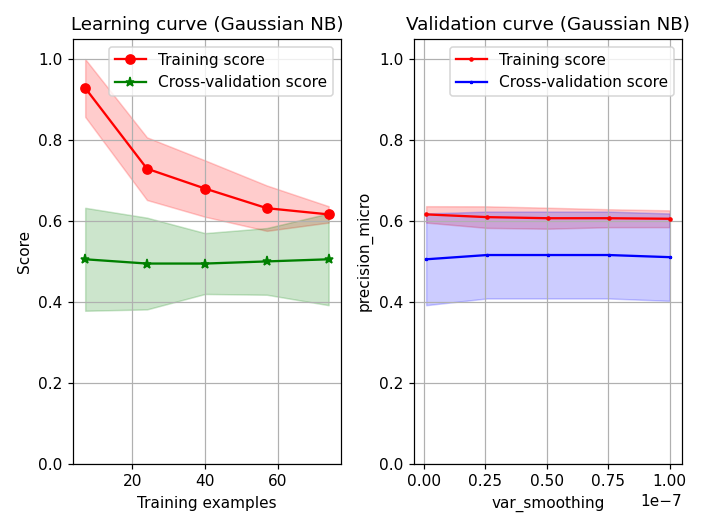

In [288]:
estimator_1 = LogisticRegression(solver='liblinear', max_iter=1000, class_weight = 'balanced', penalty='l2')
estimator_2 = RandomForestClassifier(n_estimators=20, class_weight  = 'balanced', random_state = 117)
estimator_3 = GaussianNB()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=117)

params_range = (np.linspace(0.001, 15, 30), [3, 5, 7, 10], np.linspace(1e-09, 1e-07, 5))

for estimator, title, param_name, range_ in zip([estimator_1, estimator_2, estimator_3], ["Logistic Regression", "Random Forest", "Gaussian NB"], ('C', 'max_depth', 'var_smoothing'), params_range):
    fig, axes = plt.subplots(nrows = 1, ncols = 2)
    plot_learning_curve(estimator, 
                        title='Learning curve ({})'.format(title), 
                        X=X_extended, 
                        y=y.ravel(), 
                        ylim=(0.0, 1.05), 
                        cv=cv, 
                        n_jobs=None, 
                        axes = axes[0])
    plot_validation_curve(estimator=estimator, 
                          title='Validation curve ({})'.format(title), 
                          X = X_extended, 
                          y = y.ravel(), 
                          param_name = param_name, 
                          param_range = range_, 
                          axes = axes[1], 
                          ylim=(0.0, 1.05), 
                          cv=cv, 
                          n_jobs=None)
    plt.tight_layout()

Result Summary

   **Logistic Reg**:
    
    - Score decrease as the training gets more examples, but testing score is fairly constant. The model seems to be underfitting.
    - The training score is low at every value of C, but testing score is slowly increasing as hyperparameter *C* increases
    
   **Random Forest**:
    
    - The model is doing pretty good job in during training which leads to constant value of scoring even with short amount of training data. However, overfitting is clear since testing score is significantly low and doesn't improve much with more data.
    
   **NB Gussian**:
    
    - This case is similar to that of the Logistic Regression, but curves in Validation are strongly constant.

For know, the most promising model is RandomForest, therefore we'll continue tuning it. From now, we can make the same statements about its parameters_

**1)** max_depth is not improving the score on from the limit 5. We will set this parameter to 5 or 10.

**2)** We don't need to feed the model with a high percentage of training data. We set test_size = 0.4 in ShuffleSplit(). We'll try with n_splits = 5.

**3)** We'll evaluate different values of n_estimators parameter.

<IPython.core.display.Javascript object>


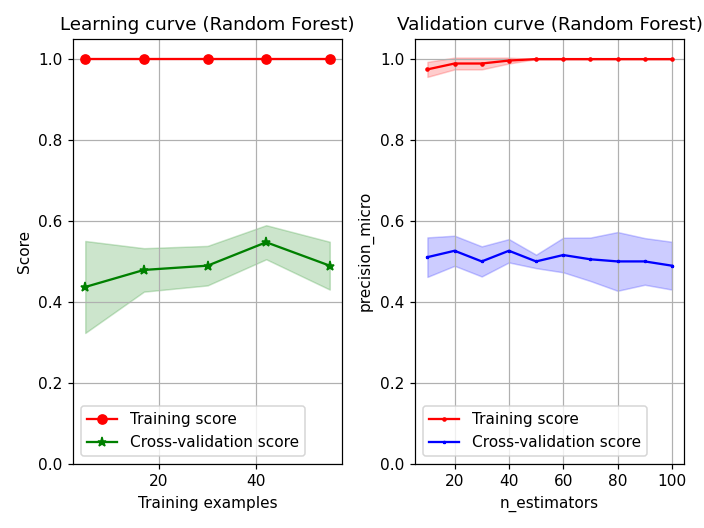

In [283]:
estimator_2_1 = RandomForestClassifier(max_depth=10, class_weight  = 'balanced',
                                 random_state = 117)


cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=117)

params_range = [np.linspace(10, 100, 10, dtype=int)]

for estimator, title, param_name, range_ in zip([estimator_2_1], ["Random Forest"], ('n_estimators', ), params_range):
    fig, axes = plt.subplots(nrows = 1, ncols = 2)
    plot_learning_curve(estimator, 
                        title='Learning curve ({})'.format(title), 
                        X=X_extended, 
                        y=y.ravel(), 
                        ylim=(0.0, 1.05), 
                        cv=cv, 
                        n_jobs=None, 
                        axes = axes[0])
    plot_validation_curve(estimator=estimator, 
                          title='Validation curve ({})'.format(title), 
                          X = X_extended, 
                          y = y.ravel(), 
                          param_name = param_name, 
                          param_range = range_, 
                          axes = axes[1], 
                          ylim=(0.0, 1.05), 
                          cv=cv, 
                          n_jobs=None)
    plt.tight_layout()

<IPython.core.display.Javascript object>


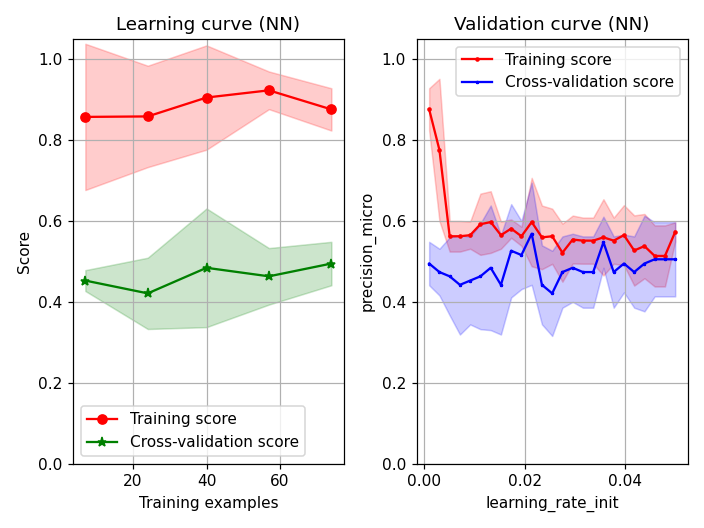

<IPython.core.display.Javascript object>


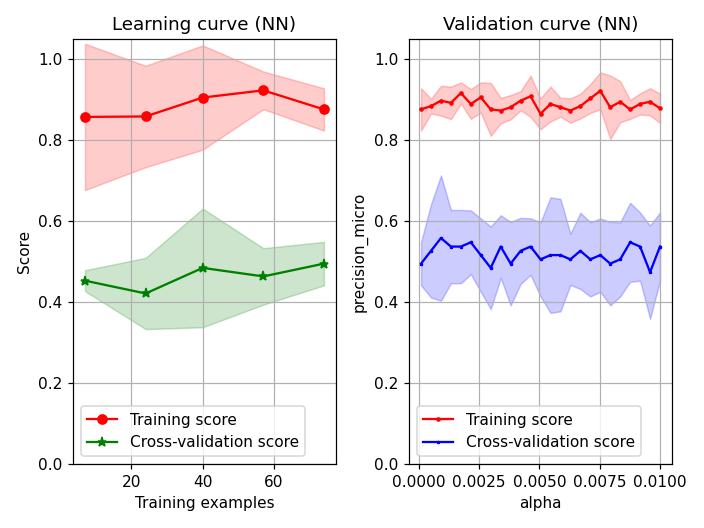

In [284]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

size_nn1 = (20, 20, 5)

estimator_nn1 = MLPClassifier(hidden_layer_sizes=size_nn1,
                     activation='relu',
                     learning_rate='constant',
                     random_state = 117,
                     alpha = 0.0001,
                     max_iter=4000
                    )

estimator_nn2 = MLPClassifier(hidden_layer_sizes=size_nn1,
                     activation='relu',
                     learning_rate='constant',
                     learning_rate_init=0.001, 
                     random_state = 117,
                     max_iter=4000
                    )

classifier_nn = OneVsRestClassifier(estimator_nn1)

cv_nn = ShuffleSplit(n_splits=5, test_size=0.2, random_state=117)

for estimator, param, param_range in zip((estimator_nn1, estimator_nn2), ('learning_rate_init', 'alpha'), (np.linspace(0.001, 0.05, 25), np.linspace(0.0001, 0.01, 25))):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plot_learning_curve(estimator=estimator, 
                        title='Learning curve (NN)'.format(title), 
                        X=X_extended, 
                        y=y.ravel(), 
                        ylim=(0.0, 1.05), 
                        cv=cv_nn, 
                        n_jobs=None, 
                        axes = axes[0])
    plot_validation_curve(estimator=estimator,
                          title='Validation curve (NN)'.format(title),
                          X = X_extended,
                          y = y.ravel(),
                          param_name = param,
                          param_range = param_range,
                          axes = axes[1],
                          ylim=(0.0, 1.05),
                          cv=cv_nn, 
                          n_jobs=None)
    plt.tight_layout()

<IPython.core.display.Javascript object>


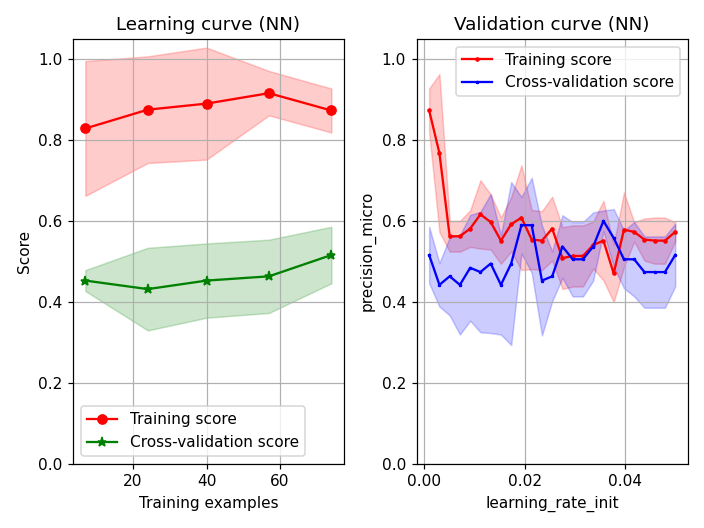

In [285]:
size_nn1 = (20, 20, 5)

estimator_nn1 = MLPClassifier(hidden_layer_sizes=size_nn1,
                     activation='relu',
                     learning_rate='constant',
                     random_state = 117,
                     alpha = 0.0005,
                     max_iter=4000
                    )

cv_nn = ShuffleSplit(n_splits=5, test_size=0.2, random_state=117)

for estimator, param, param_range in zip((estimator_nn1, ), ('learning_rate_init', ), (np.linspace(0.001, 0.05, 25), )):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plot_learning_curve(estimator=estimator,
                        title='Learning curve (NN)'.format(title),
                        X=X_extended,
                        y=y.ravel(),
                        ylim=(0.0, 1.05),
                        cv=cv_nn,
                        n_jobs=None,
                        axes = axes[0])
    plot_validation_curve(estimator=estimator,
                          title='Validation curve (NN)'.format(title),
                          X = X_extended,
                          y = y.ravel(),
                          param_name = param, 
                          param_range = param_range, 
                          axes = axes[1], 
                          ylim=(0.0, 1.05), 
                          cv=cv_nn, 
                          n_jobs=None)
    plt.tight_layout()

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(model_2_fit.estimators_[0], out_file='tree.dot', 
                feature_names = echoDf.columns[:-1],
                class_names = echoDf.columns[-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])



In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')